# Exploration 6
# 작사가 인공지능 만들기

# 후기
훈련데이터와 테스트데이터는 어떻게 쓰는거죠?   
내가 맞게 가고있는건가도 모르겠슴둥...   
아니!! 너무 어렵다고!!!   
설명은 친절하지만 project가 너무너무 어렵습니당!!  

Exploration과 Fundamental의 괴리란... 

일단 i love 까지 쓰면 i love you는 나오는데   
그 124960개는 아직도 얻질 못했다.   


### 참고한 사이트
- 15개 패딩 : https://han-py.tistory.com/284
- test_set 분리 : https://blog.naver.com/PostView.nhn?blogId=siniphia&logNo=221396370872&parentCategoryNo=&categoryNo=22&viewDate=&isShowPopularPosts=true&from=search


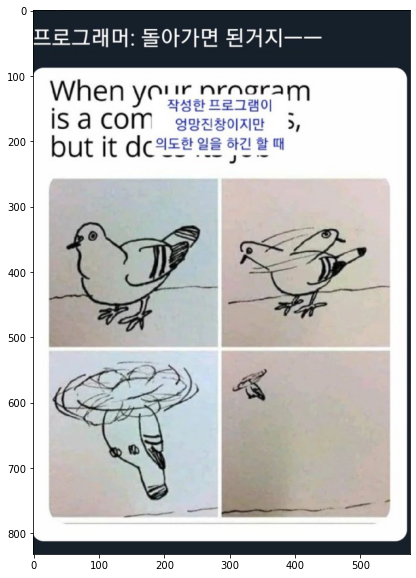

In [27]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import os


fileName = os.getenv('HOME') + "/aiffel/코딩.jpeg"

image = img.imread(fileName)

fig = plt.figure(figsize=(10,10))
plt.imshow(image)

plt.show()


# 출처: https://icodebroker.tistory.com/5198 [ICODEBROKER]

# 진행순서

1. 데이터 읽어오기 (다운로드는 먼저 진행)
2. 데이터 정제 (토큰 개수는 15개 이하로 설정한다. maxlen을 어디에 넣어야 하나?)
3. 평가 데이터셋 분리 (단어장 크기는 12000개 이상, 총 데이터셋은 전체 데이터의 20%)
4. 인공지능 모델 구축 및 학습, 평가 (embedding_size, hidden_size 조절, epoch는 10으로 설정, val_loss는 2.2 이하)

In [ ]:
# 여백의 미 두둥등장!

# 1. 데이터 읽어오기

In [1]:
import glob
import os

txt_file_path = os.getenv('HOME')+'/aiffel/lyricist/data/lyrics/*'

txt_list = glob.glob(txt_file_path)

raw_corpus = []

# 여러개의 txt 파일을 모두 읽어서 raw_corpus 에 담습니다.
for txt_file in txt_list:
    with open(txt_file, "r") as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)

print("데이터 크기:", len(raw_corpus))
print("Examples:\n", raw_corpus[:3])

데이터 크기: 187088
Examples:
 ['When somebody loved me', 'Everything was beautiful', 'Every hour we spent together']


## 자 여기서부터는 니가 해야한다.
## 아니!! 거 너무 어려운 거 아닙니까!
## AIFFEL 노드 너무 어려워요!! 초심자용으로 따로 만들어줘요!!!


# 하지만 못 먹어도 Go

In [3]:
# 여백의 미 두둥등장!

# 2. 데이터 정제

In [2]:
# 데이터 확인해봅시다.

# 정제용 모듈 설치
import re                  # 정규표현식을 위한 Regex 지원 모듈 (문장 데이터를 정돈하기 위해) 
import numpy as np         # 변환된 문장 데이터(행렬)을 편하게 처리하기 위해
import tensorflow as tf    # 대망의 텐서플로우!
import os

# 전체로 볼까요
# print("정제 전의 데이터 30개 : ",raw_corpus[:29])    # 앞에서부터 30라인만 화면에 출력해 볼까요?

# print("=====================================================")  

# 하나씩 볼까요
for idx, sentence in enumerate(raw_corpus):
    if len(sentence) == 0: continue   # 길이가 0인 문장은 건너뜁니다.
    if idx > 30: break   # 일단 문장 30개만 확인해 볼 겁니다.
    print(idx,"번째 정제 전 데이터 : " ,sentence)
    
# 30개까지 봐야 특수문자가 포함된 뭔가가 보인다.
    
print("==================정제를 시작해봅시다!===================")
print("=====================================================")    


0 번째 정제 전 데이터 :  When somebody loved me
1 번째 정제 전 데이터 :  Everything was beautiful
2 번째 정제 전 데이터 :  Every hour we spent together
3 번째 정제 전 데이터 :  Lives within my heart And when she was sad
4 번째 정제 전 데이터 :  I was there to dry her tears
5 번째 정제 전 데이터 :  And when she was happy so was I
6 번째 정제 전 데이터 :  When she loved me Through the summer and the fall
7 번째 정제 전 데이터 :  We had each other that was all
8 번째 정제 전 데이터 :  Just she and I together
9 번째 정제 전 데이터 :  Like it was meant to be And when she was lonely
10 번째 정제 전 데이터 :  I was there to comfort her
11 번째 정제 전 데이터 :  And I knew that she loved me So the years went by
12 번째 정제 전 데이터 :  I stayed the same
13 번째 정제 전 데이터 :  She began to drift away
14 번째 정제 전 데이터 :  I was left alone Still I waited for the day
15 번째 정제 전 데이터 :  When she'd say
16 번째 정제 전 데이터 :  I will always love you Lonely and forgotten
17 번째 정제 전 데이터 :  Never thought she'd look my way
18 번째 정제 전 데이터 :  She smiled at me and held me Just like she used to do
19 번째 정제 전 데이터 :  Like she

In [3]:
# 데이터 정제 함수 (한 번 해봅시다!)

def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()       # 소문자로 바꾸고 양쪽 공백을 삭제
  
    # 아래 2단계를 거쳐 sentence는 스페이스 1개를 delimeter로 하는 소문자 단어 시퀀스로 바뀝니다.
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence)        # 패턴의 특수문자를 만나면 특수문자 양쪽에 공백을 추가
    sentence = re.sub(r'[" "]+', " ", sentence)                  # 공백 패턴을 만나면 스페이스 1개로 치환
#     sentence = re.sub(r"[^\w?.!,¿']+", " ", sentence)
    sentence = re.sub(r"[^\w']+", " ", sentence)

    sentence = sentence.strip() # 다시 좌우 공백을 제거

    sentence = '<start> ' + sentence + ' <end>'      # 이전 스텝에서 본 것처럼 문장 앞뒤로 <start>와 <end>를 단어처럼 붙여 줍니다
    
    return sentence


In [4]:
# corpus를 만들어봅시당 // corpus란?! --> <start>~<end>로 구성되어 기계가 학습하기 위한 사전 전처리 데이터라고 생각하장

corpus = []

for sentence in raw_corpus:
    if len(sentence) == 0: continue   
    corpus.append(preprocess_sentence(sentence))
        
corpus[15:30] # 필요한 문장부호도 포함하고 있다.

["<start> when she'd say <end>",
 '<start> i will always love you lonely and forgotten <end>',
 "<start> never thought she'd look my way <end>",
 '<start> she smiled at me and held me just like she used to do <end>',
 '<start> like she loved me <end>',
 '<start> when she loved me when somebody loved me <end>',
 '<start> everything was beautiful <end>',
 '<start> every hour we spent together <end>',
 '<start> lives within my heart when she loved me hey sentimentos são <end>',
 '<start> fáceis de mudar <end>',
 '<start> mesmo entre quem <end>',
 '<start> não vê que alguém <end>',
 '<start> pode ser seu par basta um olhar <end>',
 '<start> que o outro não espera <end>',
 '<start> para assustar e até perturbar <end>']

In [5]:
# 토큰화를 해봅시다.

def tokenize(corpus):
    # 텐서플로우에서 제공하는 Tokenizer 패키지를 생성
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=12000,  # 전체 단어의 개수  // 여기에 12000개 하는 거겠찌?
        filters=' ',    # 별도로 전처리 로직을 추가할 수 있습니다. 이번에는 사용하지 않겠습니다.
        oov_token="<unk>"  # out-of-vocabulary, 사전에 없었던 단어는 어떤 토큰으로 대체할지
    )
    tokenizer.fit_on_texts(corpus)   # 우리가 구축한 corpus로부터 Tokenizer가 사전을 자동구축하게 됩니다.

    # 이후 tokenizer를 활용하여 모델에 입력할 데이터셋을 구축하게 됩니다.
    tensor = tokenizer.texts_to_sequences(corpus)   # tokenizer는 구축한 사전으로부터 corpus를 해석해 Tensor로 변환합니다.

    # 입력 데이터의 시퀀스 길이를 일정하게 맞추기 위한 padding  메소드를 제공합니다.
    # maxlen의 디폴트값은 None입니다. 이 경우 corpus의 가장 긴 문장을 기준으로 시퀀스 길이가 맞춰집니다.
    
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, maxlen=15, padding='post')  # 토큰개수 15개 제한 맞나?

    print(tensor,tokenizer)
    return tensor, tokenizer

tensor, tokenizer = tokenize(corpus)


# 확인! --> 문장이 숫자로!! --> 각 숫자는 특정 단어를 의미한다.
print(tensor[:3, :10])

[[  2  39 283 ...   0   0   0]
 [  2 188  50 ...   0   0   0]
 [  2 128 944 ...   0   0   0]
 ...
 [  2  34  34 ...   0   0   0]
 [  2  18  20 ...   0   0   0]
 [  2  34  34 ...   0   0   0]] <keras_preprocessing.text.Tokenizer object at 0x7f25b67c7f90>
[[   2   39  283  589   10    3    0    0    0    0]
 [   2  188   50  428    3    0    0    0    0    0]
 [   2  128  944   23 1162  286    3    0    0    0]]


In [6]:
# 그럼 그 숫자가 무엇인지 확인해봅시당

for idx in tokenizer.index_word:
    print(idx, ":", tokenizer.index_word[idx])

    if idx >= 10: break

1 : <unk>
2 : <start>
3 : <end>
4 : the
5 : i
6 : you
7 : and
8 : to
9 : a
10 : me


In [7]:
src_input = tensor[:, :-1]  # tensor에서 마지막 토큰을 잘라내서 소스 문장을 생성합니다. 마지막 토큰은 <end>가 아니라 <pad>일 가능성이 높습니다.
tgt_input = tensor[:, 1:]    # tensor에서 <start>를 잘라내서 타겟 문장을 생성합니다.

print(src_input[0]) # 하나 잘라냈을 때 길이 14개여야 함
print(tgt_input[0])

[  2  39 283 589  10   3   0   0   0   0   0   0   0   0]
[ 39 283 589  10   3   0   0   0   0   0   0   0   0   0]


In [8]:
# 데이터셋 객체를 만들어봅시다. (tf.data.Dataset 객체!)

# 데이터셋을 나눠볼까용
from sklearn.model_selection import train_test_split

enc_train, enc_val, dec_train, dec_val = train_test_split(src_input,
                                                          tgt_input,
                                                          test_size=0.2,
                                                         random_state=7)


# enc_train, enc_val, dec_train, dec_val = train_test_split(src_input,
#                                                           tgt_input,
#                                                           test_size=0.2,
#                                                           shuffle=True)


print("Source Train:", enc_train.shape) # 아니 도대체 어떻게 해야 124960개가 나오는거지??
print("Target Train:", dec_train.shape)


# 사이즈 조절은 포기한다!
BUFFER_SIZE = len(enc_train)
BATCH_SIZE = 256
steps_per_epoch = len(enc_train) // BATCH_SIZE

VOCAB_SIZE = tokenizer.num_words + 1    # tokenizer가 구축한 단어사전 내 12000개와, 여기 포함되지 않은 0:<pad>를 포함하여 12001개


dataset = tf.data.Dataset.from_tensor_slices((enc_train, dec_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset

Source Train: (140788, 14)
Target Train: (140788, 14)


<BatchDataset shapes: ((256, 14), (256, 14)), types: (tf.int32, tf.int32)>

In [9]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super(TextGenerator, self).__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out

    
# embedding 은 256, hidden 은 512 --> 둘 중 하나면 좀 올리면 될 것 같다.
embedding_size = 256 # whenever you can change this number
hidden_size = 512 # But you probably cannot take what you want.
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)

In [10]:
# 모델에 데이터 하나라도 넣고 돌려봐야 모델이 bulid가 된다.

for src_sample, tgt_sample in dataset.take(2): break # 이게 왜 전에는 안돌아가다가 1에서 2로 바꾸니까 돌아갈까요~~ 이유를 모르겠네
model(src_sample)

<tf.Tensor: shape=(256, 14, 12001), dtype=float32, numpy=
array([[[ 7.16612703e-05,  8.55051621e-05,  1.67702645e-04, ...,
         -1.86216595e-04,  2.41682006e-04, -1.89428916e-04],
        [ 1.44511680e-04,  1.25859820e-04, -2.03971533e-04, ...,
          2.15838605e-04,  3.56876262e-04,  2.55613733e-04],
        [ 8.12854410e-07,  4.20207070e-04, -6.05972135e-04, ...,
          4.16928087e-04,  2.98962317e-04,  3.49203241e-04],
        ...,
        [ 1.27322960e-03, -2.41554560e-04, -1.40314936e-04, ...,
          1.11528730e-03,  1.30437571e-03, -1.91935641e-03],
        [ 1.56702194e-03, -2.68336968e-04,  1.78645845e-04, ...,
          9.41845472e-04,  1.58634793e-03, -2.22323486e-03],
        [ 1.83165120e-03, -2.66231102e-04,  4.62886790e-04, ...,
          7.75316148e-04,  1.86083652e-03, -2.47102813e-03]],

       [[ 7.16612703e-05,  8.55051621e-05,  1.67702645e-04, ...,
         -1.86216595e-04,  2.41682006e-04, -1.89428916e-04],
        [-4.56138368e-05,  1.45288883e-04,  1

In [11]:
model.summary()

Model: "text_generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  3072256   
_________________________________________________________________
lstm (LSTM)                  multiple                  1574912   
_________________________________________________________________
lstm_1 (LSTM)                multiple                  2099200   
_________________________________________________________________
dense (Dense)                multiple                  6156513   
Total params: 12,902,881
Trainable params: 12,902,881
Non-trainable params: 0
_________________________________________________________________


In [13]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

model.compile(loss=loss, optimizer=optimizer)
model.fit(dataset, epochs=10) # epochs는 10이어야 함미당...

Epoch 1/10
549/549 [==============================] - 49s 89ms/step - loss: 2.7085
Epoch 2/10
549/549 [==============================] - 51s 93ms/step - loss: 2.6065
Epoch 3/10
549/549 [==============================] - 48s 87ms/step - loss: 2.5234
Epoch 4/10
549/549 [==============================] - 48s 87ms/step - loss: 2.4431
Epoch 5/10
549/549 [==============================] - 48s 87ms/step - loss: 2.3656
Epoch 6/10
549/549 [==============================] - 48s 87ms/step - loss: 2.2911
Epoch 7/10
549/549 [==============================] - 48s 88ms/step - loss: 2.2216
Epoch 8/10
549/549 [==============================] - 48s 88ms/step - loss: 2.1565
Epoch 9/10
549/549 [==============================] - 48s 88ms/step - loss: 2.0955
Epoch 10/10
549/549 [==============================] - 48s 88ms/step - loss: 2.0386


In [14]:
# 평가하기


# 문장을 만드는 함수!
def generate_text(model, tokenizer, init_sentence="<start>", max_len=15):
    # 테스트를 위해서 입력받은 init_sentence도 일단 텐서로 변환합니다.
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]

    # 텍스트를 실제로 생성할때는 루프를 돌면서 단어 하나씩 생성해야 합니다. 
    while True:
        predict = model(test_tensor)  # 입력받은 문장의 텐서를 입력합니다. 
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1]   # 우리 모델이 예측한 마지막 단어가 바로 새롭게 생성한 단어가 됩니다. 

        # 우리 모델이 새롭게 예측한 단어를 입력 문장의 뒤에 붙여 줍니다. 
        test_tensor = tf.concat([test_tensor, 
                                                                 tf.expand_dims(predict_word, axis=0)], axis=-1)

        # 우리 모델이 <end>를 예측했거나, max_len에 도달하지 않았다면  while 루프를 또 돌면서 다음 단어를 예측해야 합니다.
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    # 생성된 tensor 안에 있는 word index를 tokenizer.index_word 사전을 통해 실제 단어로 하나씩 변환합니다. 
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated   # 이것이 최종적으로 모델이 생성한 자연어 문장입니다.


# 문장을 만들어봅시다.
generate_text(model, tokenizer, init_sentence="<start> i love")

'<start> i love you <end> '